#OLD STUFF

The following is my answer to the connect4 work problem. Your
answer might  very well be better than mine. For now, please bear with me and use my version.

(Consider this as a practice about using others' code)

Also, note that many code are currently commented out. I will explain why in a bit

In [1]:
import numpy as np

ROW_COUNT = 6
COLUMN_COUNT = 7

def create_board():
    board = np.zeros((ROW_COUNT,COLUMN_COUNT))
    return board

def print_board(board):
    print(np.flip(board,0))

Some constants to keep for the game to work. Run the code below, you should get an empty board,

In [2]:
def init_game():
    board = create_board()
    print_board(board)
    game_over = False
    turn = 0
    ##ATTENTION:: this function returns 3 things at the same time
    return board, game_over, turn

##ATTENTION:: the 3 returned values are stored in some global variables
board, game_over, turn = init_game()

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [3]:

def is_valid_location(board,col):
    #if this condition is true we will let the use drop piece here.
    #if not true that means the col is not vacant
    return board[ROW_COUNT - 1][col]==0

Once a column decide on the column to drop, we will want to know which row is the next open row. In other words, if we drop a piece in this column ```col```, which row will the piece fall onto because of gravity.

In [4]:
def get_next_open_row(board,col):
    ##DONE
    for r in range(ROW_COUNT):
        if board[r][col]==0:
            return r
    return -1

once we decide on the column ```col``` and know the row ```row```, we can use the function below to drop a piece.

In [5]:
def drop_piece(board,row,col,piece):
    # print(row)
    # print(col)
    # print(board)
    # print(board[row][col])
    board[row][col]= piece

First implement ```winning``` to check whether a player's ```piece``` wins

In [6]:
def winning(board, piece):
    # Check horizontal locations for win
    for c in range(COLUMN_COUNT-3):
        for r in range(ROW_COUNT):
            if board[r][c] == piece and board[r][c+1] == piece and board[r][c+2] == piece and board[r][c+3] == piece:
                return True

    # Check vertical locations for win
    ##DONE
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT-3):
            if board[r][c] == piece and board[r+1][c] == piece and board[r+2][c] == piece and board[r+3][c] == piece:
                return True

    # Check positively sloped diaganols
    ##DONE
    for c in range(COLUMN_COUNT-3):
        for r in range(ROW_COUNT-3):
            if board[r][c] == piece and board[r+1][c+1] == piece and board[r+2][c+2] == piece and board[r+3][c+3] == piece:
                return True

    # Check negatively sloped diaganols
    ##DONE
    for c in range(COLUMN_COUNT-3):
        for r in range(3, ROW_COUNT):
            if board[r][c] == piece and board[r-1][c+1] == piece and board[r-2][c+2] == piece and board[r-3][c+3] == piece:
                return True
    return False

also implement a function ```no_valid_location``` to check if there is no more places to drop pieces. Assuming that no one wins and there is no more places to drop pieces, then the game ends in a draw.


In [7]:
def no_valid_location(board):
    ##DONE
    for each_col in range(COLUMN_COUNT):
        if is_valid_location(board, each_col):
            return False
    return True

Now modify your `run_game_v1` to implement ```run_game_v3```, with winning and draw detection integrated. Also, throw an error and halt the game when a player inputs an invalid value.

We are not modifying from `run_game_v2`

Hint, read about how to throw an error here: https://rollbar.com/blog/throwing-exceptions-in-python/

In [8]:
def run_game_v3(board, game_over, turn):
    ##DONE
    while not game_over:
        #Ask for player 1 input
        if turn == 0:
            col = int(input("Player 1, Make your Selection(0-6):"))
            #Player 1 will drop a piece on the board
            if is_valid_location(board,col):
                row = get_next_open_row(board,col)
                drop_piece(board,row,col,1)

            else:
                raise Exception("Player 1 made invalid move")

        #Ask for player 2 input
        else:
            col = int(input("Player 2, Make your Selection(0-6):"))
            #Player 2 will drop a piece on the board
            if is_valid_location(board,col):
                row = get_next_open_row(board,col)
                drop_piece(board,row,col,2)
            else:
                raise Exception("Player 2 made invalid move")
        print_board(board)

        if winning(board, 1):
            print("player 1 wins")
            break
        elif winning(board, 2):
            print("player 2 wins")
            break
        elif no_valid_location(board):
            print("game draws!!!")
            break
        turn += 1
        turn = turn % 2

#New Stuff Below


Now the game is ready to play for human. Let's make the game ready to play for AI.

First, let's think about what constitute a game state. You may use/call functions in the section `OLD STUFF`

In [9]:
import operator

class State:
    """Represents the state in the Connect4 problem."""

    def __init__(self, board):
        self.board = board
        self.last_move_col = None

    def set_last(self, col):
        self.last_move_col = col

    def is_valid_location(self, col):
        ##DONE
        return self.board[ROW_COUNT - 1][col]==0
    def get_next_open_row(self, col):
        ##DONE
        for row in range(len(self.board)):
          if self.board[row][col] == 0:
            return row
        return -1

    def drop_piece(self,row,col, player_piece):
        #DONE
        self.board[row][col] = player_piece

    def winning(self, player_piece):
        if winning(self.board, player_piece):
            return True
        return False
    def no_valid_location(self):
        return no_valid_location(self.board)
    def __repr__(self):
        return str(np.flip(self.board,0))

    def __str__(self):
        return str(np.flip(self.board,0))

    def __eq__(self, other):
        ##DONE
        return isinstance(other, State) and self.value == other.value

    def __hash__(self):
        return hash(self.board)

    @staticmethod
    def __ensure_instance_of_state(other):
        if not isinstance(other, State):
            raise ValueError(str(other) + " must be an instance of State")

Basically, we are rethinking the ``board'' as a state, and all the previously built functions that apply to board now should apply to state. This may be a little bit of redundant and many places we may be reusing the same code, or calling the same function. In general, this is **bad** coding practice. But this is OK for now, for several reasons:

1. We didn't know we are building State when we built Board. In fact, we could possibly delete the definitions about Board and only keep the ones about State.

2. But we are not doing that for now, because this is not a coding class. It is part of my intention to keep the old files so you can refer to them while coding new things.

3. With that being said, you should know what is more elegant, and you are welcome to practice building elegant programs. It is not required but welcome. If you do clean up, make sure your code still runs.

OK, now we can set up some example states, and also a state representing the beginning of a game.

At least one of your example states should contain a state right before a winning move. In other words, the current playing player of the state has a winning move to make in that state.

In [10]:

#a function to create new state, make things easier for you
def make_new_state(input):
    return State(np.flip(np.asarray(input),0))

#DONE
#build an example_state where a player will win in a single move.
#We will use this example_state to test our other methods later
example_state = make_new_state([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],
                                [0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[1,0,1,1,0,0,0]])
example_state2 = make_new_state([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],
                                [0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[1,2,1,1,0,0,2]])

#DONE
initial_state = make_new_state([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],
                                [0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]])

Print out your states below to make sure they really are what you expected.

In [11]:
initial_state

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

In [12]:
example_state

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0]]

In [13]:
example_state2

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 1 1 0 0 2]]

In [14]:
print(len(example_state.board))
print(len(example_state.board[0]))

6
7


OK, at this point, you may realize that, we are redoing the stuff with state in the missionaries_cannibals problem, but now with the context of connect4.

Next we are going to continue building functions related to states. As you are doing so, think about WHY you are doing them, what is the end goal?

In [15]:
board = make_new_state([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],
                                [0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]])
print("initial_state")
print(initial_state)
ns = board
print("ns_before_drop")
print(ns)
drop_piece(ns.board,0,0,1)
print("ns_after_drop")
print(ns)
print("initial_state_after_drop")
print(initial_state)
ns0 = board
drop_piece(ns0.board,0,1,1)
print("ns0_after_drop")
print(ns0)

initial_state
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
ns_before_drop
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
ns_after_drop
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
initial_state_after_drop
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
ns0_after_drop
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0]]


In [16]:
import copy
"""input: a single state, and a player_piece, indicating the player who is dropping the next piece.
  output: a list of all reachable state from the input state
"""
def get_next_states(current_state,player_piece):
  next_states = []
  #DONE
  for col in range(COLUMN_COUNT):
    new_state = make_new_state(np.flipud(current_state.board.copy()))
    if new_state.is_valid_location(col):
      st = new_state.get_next_open_row(col)
      new_state.drop_piece(st, col, player_piece)
      next_states.append(new_state)
  return next_states

Check your function by running the following, also running it with your example state.

In [17]:
get_next_states(initial_state,1)

[[[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 1]]]

In [18]:
get_next_states(example_state,1)

[[[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0]
  [1 0 1 1 0 0 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [1 1 1 1 0 0 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]
  [1 0 1 1 0 0 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0]
  [1 0 1 1 0 0 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [1 0 1 1 1 0 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [1 0 1 1 0 1 0]],
 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [1 0 1 1 0 0 1]]]

DONE

Make sure you are getting the next states as expected.

By this point, you may realize that, we haven't write any test cases or assertion statement. This once again is a bad practice, but for the same reasons we have discussed before. We are skipping that now.

One more reason for not writing test cases when building AI programs, especially more complex AI programs (which you will do soon), is that we don't really know the expected behavior sometimes. It could be a good research project, about writing test cases for AI projects.

Next, let's implement a breadth first search. Use an accumulator style, where we accumulate all nodes visited so far. If you are stuck for more than 5 min, read the next text block.



In [19]:
candidate_states = [initial_state]
##DONE
##Input: List of states
##output: true or false, whether the goal state can be reached
##For convenience, print a message indicating "true"/"false" before returning the boolean output
def search_for_goal(candidate_states):
  ##DONE
  print("lose! Cannot reach goal state")
  return False
search_for_goal(candidate_states)

lose! Cannot reach goal state


False

If you are stuck for more than 5 minutes, read the next text block...

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

OK, you are here.

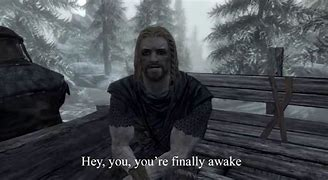

DONE::

State here how you accomplish the earlier task. If you can't do the task, state why. Or, why the earlier task doesn't make sense in the context of connect4.

The task does not make sense in the context of connect4 because there is a very large search space for a goal state. We would run out of memory if we tried to keep track of every state visited if we had to search through all possible moves. Additionally there are a very large number of states that can be the goal state. Therefore, since there is not one goal state to search for and the search space for a winning state is quite large, that would be a very difficult task to search for all possible winning states of connect4.

Now that you are aware of the difficulty ahead, let's take one step back and make an easier function, `random_move()` which gives us a random next move. I am doing this one for you

In [20]:
from IPython.utils.path import random

def random_move(candidate_state, player_piece):
    all_next = get_next_states(candidate_state,player_piece)
    return random.choice(all_next)

Now we have two ways to move forward:

1. Instead of implementing a BFS for one player to search through all steps, implement a one-step BFS, or a search for the immediate next step. If there is a winning move, make that move; If there is no winning move, return None.

With this, we can build an AI that tries to win if there is an immediate winning step, and makes random move if there is none immediate winning steps.

2. The harder step. Min-max algorithm. We will talk about this later.

Let's take the first approach for now

In [21]:
example_state.winning(1)

False

In [22]:
list = get_next_states(example_state,1)
for l in list:
  if l.winning(1):
     print(True)

True


In [23]:
from IPython.core.display import deepcopy
##Input: one state
##output: the next state.
##If input state can reach a winning state, the winning state should be returned.
def search_for_goal(candidate_state, player_piece):
  #DONE
  next_states = get_next_states(candidate_state,player_piece)
  for s in next_states:
    if winning(s.board,player_piece):
      return s
  else:
    return None


DONE
Test your `search_for_goal()` on your example state that has a winning move. Check to see if the winning move is correctly found by your `search_for_goal()`

In [24]:
print(search_for_goal(example_state, 1).winning(1))

True


In [25]:
search_for_goal(example_state, 1)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0]]

In [26]:
print(initial_state.winning(1))

False


In [27]:
print(make_new_state([[0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 2, 0, 0, 0],
    [0, 0, 2, 1, 0, 0, 0],
    [0, 2, 1, 2, 0, 0, 0],
    [2, 1, 1, 1, 0, 0, 0]]).winning(2))

True


OK. We now have a mechanism to output the next state. Let's build an AI based on this.

#Your first game playing AI

I am going to build AI00, which is just a random move AI. You will build the next one.

Let's call it AI01

In [28]:
class Agent:
  def __init__(self, player_symbol):
        self.player_symbol = player_symbol

  def make_move(self):
    pass                      # Used chatGPT to learn how to abstract a method in a parent class

In [29]:
class AI00(Agent):
    def __init__(self, player_symbol):
        super().__init__(player_symbol)
    def make_move(self, state):
        if state.no_valid_location():
            return None
        return random_move(state, self.player_symbol)


build an AI that tries to win if there is an immediate winning step, and makes random move if there is none immediate winning steps.

In [30]:
class AI01(Agent):
    def __init__(self, player_symbol):
        super().__init__(player_symbol)
    ##DONE
    def make_move(self, state):
      if search_for_goal(state,self.player_symbol) == None:
        return random_move(state,self.player_symbol)
      elif search_for_goal(state,self.player_symbol).winning(self.player_symbol):
          return search_for_goal(state,self.player_symbol)




Now, we have our first AI ready, we want to play with it in a connect4 game. To make this happen, we are going to implement a manager class tha manages the game flow for us.

In [31]:
#This will make sense later. It is used for debugging
allowed = True
def play_print(msg):
    if(allowed):
        print(msg)

In [32]:
#This should make sense now.
class GM:
    def __init__(self, player1, player2):
        self.player1 = player1
        self.player2 = player2
        self.board = State(create_board())

        self.ongoing = True
        self.turn = 1 #turn number
        self.current_player = player1.player_symbol

    def play(self):
        while self.ongoing:
            play_print("Turn # "+ str(self.turn))
            self.turn += 1
            if self.current_player == self.player1.player_symbol:
                self.board = self.player1.make_move(self.board)
            else:
                self.board = self.player2.make_move(self.board)
            play_print(self.board)
            if self.board.winning(self.current_player) != False:
                play_print("Player " + str(self.current_player) +"Won!")
                self.ongoing = False
                return self.current_player
            if self.current_player == self.player1.player_symbol:
                self.current_player = self.player2.player_symbol
            else:
                self.current_player = self.player1.player_symbol

            if self.board.no_valid_location():
                play_print("Draw!")
                self.ongoing = False
                return 0



Now use code to set up two AI01 players, and have they play against each other.

In [33]:
#DONE run the following. If you have done everything correctly,
#this should play out a game for you
GM(AI01(1),AI01(2)).play()


Turn # 1
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]
Turn # 2
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 0. 0. 0.]]
Turn # 3
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 2. 0. 0. 0.]]
Turn # 4
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 2. 0. 2. 0.]]
Turn # 5
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 2. 0. 2. 0.]]
Turn # 6
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 2. 0. 2. 2.]]
Turn # 7
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.

2

Now, since both player are playing at random, let's run our simulation 100 times and see who wins more.

By changing this flag `allowed` to `False`, now we are not printing the game as the simulation happens.

In [34]:
def hundred_battle(player1, player2, count = 100):
    global allowed
    allowed = False
    player1wins = 0
    player2wins = 0
    for i in range(count):
        winner = GM(player1,player2).play()
        if winner == player1.player_symbol:
            player1wins += 1
        elif winner == player2.player_symbol:
            player2wins += 1
    print(player1wins)
    print(player2wins)


DONE:: look up the python keyword `global`. 'global' allows a user to modify a variable outside the current scope.

Explain to me what would happen if I don't have line 2 in `hundred_battle()`, and why it happens

'allowed' was defined above and was set to true. Therefore, if you do not assign the 'allowed' to be true anytime "play_print()" is called, it would print not print the game as it happens or the result of the game.

DONE run the following

In [35]:
hundred_battle(AI01(1),AI01(2))

65
35


I got player1 winning 60 out of 40 games.

I wonder why.

Let's try more simulated games, where you have

AI00 vs AI00

AI00 vs AI01

DONE:: run the following multiple code segments.

In [36]:
hundred_battle(AI00(1),AI00(2))

54
46


In [37]:
hundred_battle(AI00(1),AI01(2))

18
82


In [38]:
hundred_battle(AI01(1),AI01(2))

57
43


What do you get as output? Does it make sense?

If you think any of your output does not make sense, there are two possibilities: 1. Your AI is not implemented correctly. 2. The AI is correct, but your expectation misalign with the reality.

This is another reason we don't write test cases instead we just test run our AI programs. Sometimes researcher/programmers build an AI to pass a test case, but their expectation (the test case) is actually not aligned with the reality. If they insist their test cases being right, then they may forcefully "fix" their AI program to pass the test.

Insert [reality can be whatever I want] meme

Either way, you should pause here until the outputs make sense to you.

Next, also implement a way so that you can play against your AI player. To achieve this, you need a class for human player. In its make_move() function, it should prompt the user for an input, like what we used to do in the old connect4 code.

In [39]:
class Human(Agent):
    def __init__(self, player_symbol):
        super().__init__(player_symbol)

    def make_move(self, state):
        #DONE
        col = int(input("Player" + str(self.player_symbol) + ", Make your Selection(0-6):"))
        #Player 1 will drop a piece on the board
        if state.is_valid_location(col):
            ##DONE
            row = get_next_open_row(state.board,col)
            drop_piece(state.board,row,col,self.player_symbol)
            return state
        else:
            raise Exception("Human " +str(self.player_symbol)+" made invalid move")
            return None

HINT:: Duing my coding, I encountered lots of bugs, because I was using my old code about `board` instead of new code about `state`. For example, I was using `is_valid_location(board,col)` instead of `state.is_valid_location(col)`. You should look at your code.

For best result, you can clean your code so old stuff becomes obsolete (for example, commented out), so that you are always using new stuff. By commenting out old stuff, if using old stuff, you will get an error.

DONE:: play with your AI, at least 3 times.
Can you be nice and help your AI to win at least once? (For the sake of testing)

You should beat your AI at least twice.

In [40]:
allowed = True
##DONE uncomment below to play the game.
GM(Human(1),AI01(2)).play()

Turn # 1


KeyboardInterrupt: ignored

DONE:: At this point, we have several classes, `AI00`, `AI01`, and `Human` that share very similar signature. They should be children classes under a single parent class. Optimize your previous code so that this is the case.

Read [link text](https://www.w3schools.com/python/python_inheritance.asp) if you need to learn about python inheritance.

#AI02

After playing a few rounds, you realize that your AI is not smart enough. To begin with, when you (the human player) have a winning move, your AI is not actively blocking you.  


Build `AI02` that plays like `AI01` and also actively defend against your winning move. In other words, `AI02` will make a winning move if there is one, and if the opponent has 3 in a row, `AI02` should actively block one of the open ends, if they are still open.

In [41]:
 ##Input: one state
 ##output: the next state.
 ##If input state can reach a winning state, the winning state should be returned.
def search_for_goal(candidate_state, player_piece):
     #DONE

     all_next = get_next_states(candidate_state, player_piece)
     for each_next_state in all_next:
         if each_next_state.winning(player_piece):
             return each_next_state

     return None


In [42]:
search_for_goal(example_state,1).winning(1)

True

In [43]:
class AI02:
    def __init__(self, player_symbol):
        self.player_symbol = player_symbol

    #use the following function to your advantage
    def set_opponent(self, opponent_symbol):
        self.opponent_symbol = opponent_symbol

    def make_move(self, state):
        ##DONE
        winning_move = search_for_goal(state,self.player_symbol)
        opponent_winning_move = search_for_goal(state,self.opponent_symbol)


        if winning_move is not None:
          return winning_move


        elif opponent_winning_move is not None:
          for col in range(COLUMN_COUNT):
            row = get_next_open_row(state.board,col)

            temp_state = copy.deepcopy(state)

            drop_piece(temp_state.board,row,col,self.opponent_symbol)
            if temp_state.winning(self.opponent_symbol):
              temp_state.set_last(col)
              drop_piece(state.board,row,temp_state.last_move_col,self.player_symbol)
              return state

        else:
          return random_move(state,self.player_symbol)




       # if search_for_goal(state,self.player_symbol) is None or search_for_goal(state,self.opponent_symbol) is None:
       #   return random_move(state,self.player_symbol)
       # elif search_for_goal(state,self.opponent_symbol).winning(self.opponent_symbol):
          # Use last_move_col to record what the last move was so you can use that move to block
          # To make this loop thorugh all the columns, in the loop check the next open row
          # then drop the piece on a deepcopy. If that move is winning, drop that same move on
          # the original state using the player_symbol
         # temp_state = copy.deepcopy(state)
         # for col in range(COLUMN_COUNT):
          #  row = get_next_open_row(temp_state.board,col)
          #  drop_piece(temp_state.board,row,col,self.opponent_symbol)
           # if temp_state.winning(self.opponent_symbol):
           #   temp_state.set_last(col)
           #   drop_piece(state.board,row,temp_state.last_move_col,self.player_symbol)
         # return state
       # elif search_for_goal(state,self.player_symbol).winning(self.player_symbol):
        #  return search_for_goal(state,self.player_symbol)


Simulate games between `AI02` and other AIs. If you implemented correctly, `AI02` should destroy all other AIs.

In [44]:
range(COLUMN_COUNT)

range(0, 7)

In [45]:
AI2 = AI02(1)
AI2.set_opponent(2)
allowed = False
hundred_battle(AI2, AI01(2))

84
16


In [46]:
hundred_battle(AI01(2), AI2)

21
79


In [47]:
hundred_battle(AI2, AI00(2))

98
2


In [48]:
AI02test = AI02(2)
AI02test.set_opponent(1)
allowed = False
hundred_battle(AI02test,AI2)

59
36


My `AI02` is winning against `AI01` 85% of the time. And it also wins against `AI00` 97% of the time.

DONE

`AI02` essentially considers the opponent's potential winning move. In other words, `AI02` considers one step ahead of `AI01`. Occassionally, `AI02` still loses to `AI01`. Why?

Explain this with an actual game scenario. Hand-wavy answer such as "because AI01 somehow manages to get the upperhand" is not accepted here.

A potential scenario where 'AI02' could lose is if there are two options for 'AI01' to win. In that case, 'AI02' could still block one of the options for 'AI01' to win, but it cannot block both.



#Min-Max game



With `AI02` implemented, you may think: I can do better and implement `AI03` by considering one more step ahead. And after that, you may implement `AI04` by considering yet one more step... It seems like an infinite cycle, you could go on and on and consider all scenarios down the road.

This is also way more complex than our `AI02`. Our `AI02` does 3 things in order:

1. Check if they can win in one move, if so, make that move.
2. Check if the opponent can win in one move, if so, block that move.
3. Randomly make a move

This is a series of sequential conditions and decisions. There is no branching involved. However, if we were to build `AI03` which considers one more step ahead, then it might involve branching. For example, your opponent now has two pieces in a row and can potentially make it into a 3 piece by either droping on the left or the right of the two pieces. Here your opponent has 2 ways to set up a winning condition, and therefore you will need to consider multiple branching scenarios (Do you block on the left or the right side).

This is what we are going to do.

DONE

Read https://towardsdatascience.com/how-a-chess-playing-computer-thinks-about-its-next-move-8f028bd0e7b1

#In-class Activity -- Illustrating the complexity of min-max algorithm

Before let's move on to implementing min-max algorithm. Let's play a game. This is a game from the TV show `Alice in Borderland`.

King of Diamonds’ Supreme Court Ruling

This game is set in Japan’s Supreme Court building where players choose a number between 0 and 100.

The average score from these numbers is taken and multiplied by 0.8; the player who guessed the number closest to this figure wins the round.

The losing players each then have one point removed from their total, starting from 5.

If a player reaches 0 points, they are out. The last standing player wins the game.

Let's play this in class. This is a super hard game to win (in theory) and illustrates the idea of min-max algorithm.

Optional TODO

Play this with your friends, or pretend you are multiple players at the same time. Is there an optimal strategy to this game? If you find one, remember to share with us next class.

Other similar puzzles: see

Pirate Divide Treasure problem

"A village of 100 couple" problem

#Towards building min-max algorithm for connect 4.

We are going to build two AIs. One is a brute force AI, that considers all possible moves of your opponent, and tries to find the best move, or a move that will surely win you the game. This is possible in connect4, because people have proven that there is a sure-win strategy if you are the first player. We are going to prove this again, using our `MinMaxAI`.

The other AI we are going to build, is going to be more elegant, graceful, and creative. Let's hold on to that thought until later.

OK, now to `BruteAI`

I will build the evaluate utility function for you.


And you will build the min-max algorithm and the AI itself. This is a hard task and you will need to fully understand all the material above to proceed, and the course content of course (get it?).

Use the pseudo-code in the reading to your advantage.

NOTE:: For this one task, you can only use my `evaluate()` as the utility function. You may have a better one mind, and you will have the chance to build your own later.

In [49]:
def evaluate(state, player_symbol,opponent_symbol):
    if state.winning(player_symbol):
        return 1
    elif state.winning(opponent_symbol):
        return -1
    else:
         return 0

In [50]:
list = [get_next_states(initial_state,1),get_next_states(initial_state,2)]
print(list)

[[[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]], [[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]], [[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]], [[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]], [[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]], [[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]], [[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]]], [[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]], [[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]], [[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0

This is the `maximize()` function that calculates the max possible score for the current state.  You can look at the next function to see how `maximize()` is used, to give yourself more hint.

In [51]:
#input: state, player's symbol and opponent's symbol
#output: the maximum possible score to earn by the player, starting from the current state.
def maximize(state, player_symbol, opponent_symbol):
    score = evaluate(state, player_symbol, opponent_symbol)
    if score == 0:
        ##DONE
        return 0
    else:
        ##DONE
        max_score = -math.inf     # used chatGPT to set a max score of negative infinity at the beginning
        move_possibilities = get_next_states(state,player_symbol)
        for s in move_possibilities:
          utility = minimize(s,player_symbol, opponent_symbol) # Get next states then find minimum score for opponent
          if utility > max_score:         # If the calculated utility is greater than current score
            max_score = utility     # If the calculated utility is greater set score to utility
    return score



#You may want to use this.
def minimize(state, player_symbol, opponent_symbol):
    return (-1) * maximize(state, opponent_symbol, player_symbol)

Now the min-max AI uses `maximize()` function

In [52]:
class MinMaxAI:
    def __init__(self, player_symbol):
        self.player_symbol = player_symbol
    def set_opponent(self, opponent_symbol):
        self.opponent_symbol = opponent_symbol
    def make_move(self, state):
      #DONE
      if state.no_valid_location():
        return None
      else:
        potential_choice = get_next_states(state,self.player_symbol)
        scores = [0] * len(potential_choice)
        for i in range(len(potential_choice)):
          scores[i] = maximize(potential_choice[i],self.player_symbol,self.opponent_symbol)
        argmax = scores.index(max(scores))
        return potential_choice[argmax]





In [55]:
minMaxAI = MinMaxAI(1)
minMaxAI.set_opponent(2)
allowed = True
#DONE, uncomment and run the following
GM(minMaxAI, AI01(2)).play()

Turn # 1
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]
Turn # 2
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 2. 0. 0.]]
Turn # 3
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 2. 0. 0.]]
Turn # 4
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 2. 2. 0.]]
Turn # 5
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 2. 2. 0.]]
Turn # 6
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 2. 0.]
 [1. 0. 0. 0. 2. 2. 0.]]
Turn # 7


KeyboardInterrupt: ignored

 DONE

Potential BUG: Your code might run on forever. This shouldn't happen, connecet4 is a game such that there are more and more pieces dropping on the board and eventually the game should stop. If your AI runs forever, something is wrong.

OR.. IS IT???

Think for yourself. Is this a bug, or is this a feature? Mathematically explain to me why the program is running on forever.

HINT: you may try some ways to figure out how long does the program take to search through, say, 10 states. This kind of tells you the speed of the search

HINT 2: Time = Total Task / Speed

The reason it runs forever is because it gets to a point where the search space is too large and the program recurses without finding a case that exits the prorgam out of the recursion, thus causing a recursion error. For example, if you give the minmax one state, there are 6 other states it can reach. That means, there is a branching factor of 6 from one state. You can use the following formula to calculate how many nodes it would have to search through. According to ChatGPT, the following formula, Total Nodes = (Branching Factor^(Depth + 1) - 1) / (Branching Factor - 1), can be used to find the number of nodes. At depth two there are 43 total nodes. At height six there are 46,656 nodes, so you can see the expoential growth that causes the recursion error.



DONE

Think about how do you solve this. Is there some clever way you can think of? A method to solve the issue is to set a depth-limit to prevent infinite recursion.

Can you try to implement your method?

What kind of issue do you encounter during your implementation? The issue I encounter is trying to implement a depth-limit with the current evaluate function.


DONE

The issue is that we are doing a DFS. An effective way to fix this issue is to limit depth of the search. However, this may not work with our current `evaluate`. Why? This may not work because there will rarely be a clear enough value that can signify that the rest of the tree will not have to be explored

Read https://en.wikipedia.org/wiki/Alpha–beta_pruning

Watch https://www.youtube.com/watch?v=l-hh51ncgDI

##Alpha beta pruning minimax algorithm with depth limit

(That's one hell of a long title, just like an apple phone's name. Air, Pro, mini, Max, Studio, or Ultra)

DONE

HARD TASK

Aware of the flaw, we are still going to use alpha beta pruning with our min-max algorithm, with a depth limit integrated.

In [56]:
import math # you may want to use math.inf

#DONE, implement the new utility function for alpha-beta minimax algorithm
def evaluate0(state,player_symbol,opponent_symbol):
  for next_state in get_next_states(state,player_symbol):
    if next_state.winning(player_symbol):
      return 1

  for next_state in get_next_states(state,opponent_symbol):
    if next_state.winning(opponent_symbol):
      return -1

  if state.winning(player_symbol):
    return 2
  elif state.winning(opponent_symbol):
    return -2
  else:
    return 0




# Credit the youtube video above

#input: state, player's symbol and opponent's symbol
#output: the maximum possible score to earn by the player, starting from the current state.
#HINT:: I give out bunch of parameters here, use them all
def minmax_alpha_beta(state, depth, player_symbol, opponent_symbol, alpha, beta, maximizing):
    score = evaluate(state, player_symbol, opponent_symbol)

    if depth == 0:
      return score

    if maximizing:
      maxEval = -math.inf
      for next_state in get_next_states(state,player_symbol):
        eval = minmax_alpha_beta(next_state,depth-1,player_symbol,opponent_symbol,
                                 alpha,beta,False)
        maxEval = max(maxEval,eval)
        alpha = max(alpha,maxEval)

        if beta <= alpha:
          break
      return maxEval
    else:
        minEval = math.inf
        for next_state in get_next_states(state,opponent_symbol):
            eval = minmax_alpha_beta(next_state,depth-1,player_symbol,opponent_symbol,
                                     alpha,beta,True)
            minEval = min(minEval,eval)
            beta = min(beta,minEval)
            if beta <= alpha:
              break

        return minEval

    #if depth == 0 or score != 0:
    #    return score
    #if maximizing:
    #    ##DONE
    #    max_eval = -math.inf
    #    for next_state in get_next_states(state,player_symbol):
    #      eval = minmax_alpha_beta(next_state,depth-1,player_symbol,opponent_symbol,
    #                                  alpha,beta,False)
    #      max_eval = max(max_eval,eval)
    #      alpha = max(alpha,eval)
    #      if alpha >= beta:  # Can try to compare max_eval against beta (beta <= max_eval)
    #        break
    #    return max_eval
    #
    #else:
    #    min_eval = math.inf
    #    for next_state in get_next_states(state,opponent_symbol):
    #      eval = minmax_alpha_beta(next_state,depth-1,player_symbol,opponent_symbol,
    #                                  alpha,beta,True)
    #      min_util = min(min_eval,eval)
    #      beta = min(beta,eval)
    #      if min_eval <= alpha:  # Can try to compare min_eval against alpha (alpha >= min_eval)
    #        break
    #    return min_eval

## TODO, you may build a minimize() as well, or you may even get away without building one.

In [57]:
minmax_alpha_beta(example_state,3,1,2,-math.inf,math.inf,True)

1

In [58]:
class MinMaxAI_alpha_beta:
    def __init__(self, player_symbol, depth):
        self.player_symbol = player_symbol
        self.depth = depth
    def set_opponent(self, opponent_symbol):
        self.opponent_symbol = opponent_symbol

    def make_move(self, state):
        ##DONE
        # If there is a winning move take, if opponent has winning defend like AI02,
        # else check discord for snippet

      if state.no_valid_location():
        return None


      winning_move = search_for_goal(state,self.player_symbol)
      opponent_winning_move = search_for_goal(state,self.opponent_symbol)



      if winning_move is not None:
        #print("ran winning move")
        return winning_move

      elif opponent_winning_move is not None:
          for col in range(COLUMN_COUNT):

            row = get_next_open_row(state.board,col)
            temp_state = copy.deepcopy(state)

            drop_piece(temp_state.board,row,col,self.opponent_symbol)

            if temp_state.winning(self.opponent_symbol):
              temp_state.set_last(col)
              drop_piece(state.board,row,temp_state.last_move_col,self.player_symbol)
         # print("ran blocking for loop")
          return state

      else:
        potential_choice = get_next_states(state,self.player_symbol)
        #print("running potential_choice")
        scores = [0] * len(potential_choice)
        #print("running scores")

        for i in range(len(potential_choice)):
          scores[i] = minmax_alpha_beta(potential_choice[i],self.depth,self.player_symbol,
                                     self.opponent_symbol,-math.inf,math.inf,True)
        #print("ran for loop")
        argmax = scores.index(max(scores))
        #print("set argmax")
        return potential_choice[argmax]










Test run

In [59]:
minMaxAI = MinMaxAI_alpha_beta(1, 6)
minMaxAI.set_opponent(2)
minMaxAI.make_move(example_state)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0]]

In [60]:
minMaxAI = MinMaxAI_alpha_beta(1, 6)
minMaxAI.set_opponent(2)
minMaxAI.make_move(example_state2)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 2 1 1 1 0 2]]

In [61]:
minMaxAI = MinMaxAI_alpha_beta(1, 1)
minMaxAI.set_opponent(2)
allowed = True
player2 = AI02(2)
player2.set_opponent(1)
GM(minMaxAI, player2).play()

Turn # 1
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]
Turn # 2
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0. 0. 0.]]
Turn # 3
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0. 0. 0.]]
Turn # 4
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 2. 2. 0. 0. 0. 0.]]
Turn # 5
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 2. 2. 0. 0. 0. 0.]]
Turn # 6
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 2. 2. 0. 0. 0. 0.]]
Turn # 7
[[0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0.

1

In [62]:
minMaxAI = MinMaxAI_alpha_beta(1, 6)
minMaxAI.set_opponent(2)
allowed = True
#DONE, uncomment and run the following
GM(minMaxAI, AI01(2)).play()

Turn # 1
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]
Turn # 2
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 2. 0.]]
Turn # 3
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 2. 0.]]
Turn # 4
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 2. 2. 0.]]
Turn # 5
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 2. 2. 0.]]
Turn # 6
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 2. 2. 0.]]
Turn # 7
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.

1

DONE

More test runs. Make sure your program runs, and make sure the result matches with your expectation.

Write about each result, why does the result happen? (for example, if a player wins 98%, why is that player having such an advantage?)

In [63]:
allowed = False
minMaxAI = MinMaxAI_alpha_beta(1, 6)
minMaxAI.set_opponent(2)
hundred_battle(minMaxAI, AI01(2))

KeyboardInterrupt: ignored

This result happens because minMaxAI is able to find the best moves multiple moves ahead and therefore can easily pick moves that put itself in the best position. While the oponnent 'AI01' only makes a winning move if there is one for itself. Else it makes a random move.

The above used me 2400 sec. 40 min.  Our minimax AI with alpha-beta pruning wins 98% of the time

In [70]:
allowed = False
player1 = MinMaxAI_alpha_beta(1, 0)
player1.set_opponent(2)
player2 = AI02(2)
player2.set_opponent(1)

hundred_battle(player1, player2)

67
32


In my implementation, `MinMaxAI_alpha_beta(1, 0)` is actually equivalent to `AI01` and `MinMaxAI_alpha_beta(1, 1)` is equivalent to `AI02`. My result above provides some evidence (it has similar performance when pitched against the same opponent).

In [69]:
allowed = False
player1 = MinMaxAI_alpha_beta(1, 1)
player1.set_opponent(2)
player2 = AI02(2)
player2.set_opponent(1)

hundred_battle(player1, player2)

62
34


The results of this match are likely to be closer because when minMaxAI has a depth of 1 it can only look one move ahead. Which is what AI02 does by looking to see if the opponent has a winning move. If the opponent does then AI02 will block that move.

Above only used 12 sec.

In [66]:
allowed = False
player1 = AI01(1)
# player1.set_opponent(2)
player2 = AI02(2)
player2.set_opponent(1)

hundred_battle(player1, player2)

23
77


AI02 is likely to win many games because it can block it's opponent from winning while AI01 can only make a winning move for itself.

In [67]:
allowed = False
player1 = MinMaxAI_alpha_beta(1, 3)
player1.set_opponent(2)
player2 = AI02(2)
player2.set_opponent(1)

hundred_battle(player1, player2)

61
35


These result are more in favor of minMaxAI because the depth of the minMaxAI is set to three meaning it can look three moves ahead giving it an advantage over AI02 which can only block the opponent's move by looking one move ahead.

In [71]:
allowed = False
player1 = MinMaxAI_alpha_beta(1, 2)
player1.set_opponent(2)
player2 = MinMaxAI_alpha_beta(2, 4)
player2.set_opponent(1)

hundred_battle(player1, player2)

0
0


player2 should win more game because of the fact that player2 can look further ahead in moves with a depth of 6. In contrast to player1 which can only check 3 moves ahead.

Give your self a pat on the back.

#Connect4 is solved

Solved game is boring. In the case of connect4, it is proven that if you are the first player, and if you start from the middle, you guarantee a winning move.

We are going to build a variation of connect 4 `new_connect4`, and have you build your own AIs to play the new connect4.

#A new variation of connect4

To make the game unsolved, we are going to introduce randomness into the game. So here is the deal:

`new_connect4` is just like traditional connect4, except that every time a player takes a non-winning move, there is a 10% chance that the bottom row of the game board will sink down. The pieces on the bottom row will be deleted from the game and all pieces on other rows will drop down by 1 level.

In [ ]:
def shift_rows(arr):
    # Get the number of rows and columns in the array.
    num_rows = arr.shape[0]
    num_cols = arr.shape[1]

    # Create a new array
    new_arr = np.zeros((num_rows, num_cols))
    for i in range(num_rows - 1):
        new_arr[i] = arr[i + 1]
    return new_arr


In [ ]:
import signal
import time


def handle_timeout(signum, frame):
    raise TimeoutError


def my_task():
    for i in range(3):
        print(f"I am working something long running, step {i}")
        time.sleep(1)


signal.signal(signal.SIGALRM, handle_timeout)
signal.alarm(5)  # 5 seconds

try:
    my_task()
except TimeoutError:
    print("It took too long to finish the job")
finally:
    signal.alarm(0)


"""
I am working something long running, step 0
I am working something long running, step 1
I am working something long running, step 2
I am working something long running, step 3
I am working something long running, step 4
It took too long to finish the job
"""

In [ ]:
import signal
import time
## using https://testdriven.io/tips/34676c2c-927a-4256-8393-1df736ee7ce1/
## for function timing
timeout_limit = 10
class New_connect4_GM:
    def __init__(self, player1, player2):
        self.player1 = player1
        self.player2 = player2
        self.board = State(create_board())

        self.auto1 = AI00(player1.player_symbol)
        self.auto2 = AI00(player2.player_symbol)

        self.ongoing = True
        self.turn = 1 #turn number
        self.current_player = player1.player_symbol

    def play(self):
        while self.ongoing:
            play_print("Turn # "+ str(self.turn))
            self.turn += 1

            signal.signal(signal.SIGALRM, handle_timeout)
            signal.alarm(timeout_limit)

            if self.current_player == self.player1.player_symbol:
                try:
                    self.board = self.player1.make_move(self.board)
                except TimeoutError:
                    play_print("player1 timeout! auto move made")
                    self.board = self.auto1.make_move(self.board)
                finally:
                    signal.alarm(0)
            else:
                try:
                    self.board = self.player2.make_move(self.board)
                except TimeoutError:
                    play_print("player2 timeout! auto move made")
                    self.board = self.auto2.make_move(self.board)
                finally:
                    signal.alarm(0)


            play_print(self.board)
            if self.board.winning(self.current_player) != False:
                play_print("Player " + str(self.current_player) +"Won!")
                self.ongoing = False
                return self.current_player
            if self.current_player == self.player1.player_symbol:
                self.current_player = self.player2.player_symbol
            else:
                self.current_player = self.player1.player_symbol

            if self.board.no_valid_location():
                play_print("Draw!")
                self.ongoing = False
                return 0
            if random.random() <= 0.1:
                self.sink()
    def sink(self):
        self.board.board = shift_rows(self.board.board)



#IT'S TIME TO DUELLLLLLLLLL!

https://www.youtube.com/watch?v=Cb3ggoyqXmU

Last time I checked, nobody knows this

Oh god, I am old..

DONE

Implement your own AI named `AI_your_name` (mine would be `AI_Xiaomeng_Ye`).

You may create helper functions, if you do, make sure you name them `helper_function_your_name`.

The reason we ask you to name your functions uniquely this way, is that we are going to have a tournament of AIs pitched against each other, in class! (So if you happen to name your functions the same name, the program may crash)

Here are some special rules

Only your own AI part of code will be used. You should use a single code block below to contain everything needed for your AI class. We will instantiate your class and run it with our own tournament code.

Your AI should output a move within a time limit of 10 sec. If you do not output a move within the time limit, a random move will be taken for you instead.

Students will be paired in a Double-elimination tournament

Your code for this section may be exposed to everyone in the class. Please discuss with me if you don't feel comfortable about this.

In [ ]:
#DONE, implement the new utility function for alpha-beta minimax algorithm
def evaluate_TJ_Tracy(state,player_symbol,opponent_symbol):
  for next_state in get_next_states(state,player_symbol):
    if winning(next_state.board,player_symbol):
      return 2


  for next_state in get_next_states(state,opponent_symbol):
    if winning(next_state.board,opponent_symbol):
      return -2

  if winning(state.board,player_symbol):
      return 1
  elif winning(state.board,player_symbol):
    return -1
  else:
    return 0

def minmax_alpha_beta_TJ_Tracy(state, depth, player_symbol, opponent_symbol, alpha, beta, maximizing):
    score = evaluate_TJ_Tracy(state, player_symbol, opponent_symbol)

    if depth == 0 or score != 0:
      return score

    if maximizing:
      maxEval = -math.inf
      for next_state in get_next_states(state,player_symbol):
        eval = minmax_alpha_beta(next_state,depth-1,player_symbol,opponent_symbol,
                                 alpha,beta,False)
        maxEval = max(maxEval,eval)
        alpha = max(alpha,maxEval)

        if beta <= alpha:
          break
      return maxEval
    else:
        minEval = math.inf
        for next_state in get_next_states(state,opponent_symbol):
            eval = minmax_alpha_beta(next_state,depth-1,player_symbol,opponent_symbol,
                                     alpha,beta,True)
            minEval = min(minEval,eval)
            beta = min(beta,minEval)
            if beta <= alpha:
              break

        return minEval

class AI_TJ_Tracy:
  def __init__(self, player_symbol,depth):
        self.player_symbol = player_symbol
        self.depth = depth

    #use the following function to your advantage
  def set_opponent(self, opponent_symbol):
        self.opponent_symbol = opponent_symbol

  def make_move(self, state):
        ##DONE
    winning_move = search_for_goal(state,self.player_symbol)
    opponent_winning_move = search_for_goal(state,self.opponent_symbol)
    if winning_move is not None:
          return winning_move


    elif opponent_winning_move is not None:
          temp_state = copy.deepcopy(state)
          for col in range(COLUMN_COUNT):
            row = get_next_open_row(temp_state.board,col)
            drop_piece(temp_state.board,row,col,self.opponent_symbol)
            if temp_state.winning(self.opponent_symbol):
              temp_state.set_last(col)
              drop_piece(state.board,row,temp_state.last_move_col,self.player_symbol)
              return state

    else:
      potential_choice = get_next_states(state,self.player_symbol)
      #print("running potential_choice")
      scores = [0] * len(potential_choice)
        #print("running scores")

      for i in range(len(potential_choice)):
        scores[i] = minmax_alpha_beta_TJ_Tracy(potential_choice[i],self.depth,self.player_symbol,
                                     self.opponent_symbol,-math.inf,math.inf,True)
        #print("ran for loop")
      argmax = scores.index(max(scores))
        #print("set argmax")
      return potential_choice[argmax]

In [ ]:
def new_hundred_battle(player1, player2, count = 100):
    allowed = False
    player1wins = 0
    player2wins = 0
    for i in range(count):
        winner = New_connect4_GM(player1,player2).play()
        if winner == player1.player_symbol:
            player1wins += 1
        elif winner == player2.player_symbol:
            player2wins += 1
    print("player1wins" , str(player1wins))
    print("player2wins" , str(player2wins))

In [ ]:
allowed = True
player1 = AI01(1)
# player1.set_opponent(2)
player2 = MinMaxAI_alpha_beta(2, 10)
player2.set_opponent(1)

New_connect4_GM(player1, player2).play()


In [ ]:
allowed = False
player1 = AI_TJ_Tracy(1)
player1.set_opponent(2)
player2 = MinMaxAI_alpha_beta(2, 10)
player2.set_opponent(1)

new_hundred_battle(player1,player2,10)

In [ ]:
allowed = False
player1 = AI_TJ_Tracy(1)
player1.set_opponent(2)
player2 = AI02(2)
player2.set_opponent(1)

new_hundred_battle(player1,player2,10)

In [ ]:
def count_threes_jessica(state, symbol):
    threes = 0
    temp_state = copy.deepcopy(state);
    for row in range(ROW_COUNT):
        for col in range(COLUMN_COUNT):
            if temp_state.board[row][col] == symbol:
                # Check horizontally
                if col <= COLUMN_COUNT - 4:
                    if temp_state.board[row][col + 1] == symbol and temp_state.board[row][col + 2] == symbol:
                        threes += 1
                # Check vertically
                if row <= ROW_COUNT - 4:
                    if temp_state.board[row + 1][col] == symbol and temp_state.board[row + 2][col] == symbol:
                        threes += 1
                # Check diagonally (both directions)
                if col <= COLUMN_COUNT - 4 and row <= ROW_COUNT - 4:
                    if (
                        temp_state.board[row + 1][col + 1] == symbol
                        and temp_state.board[row + 2][col + 2] == symbol
                    ):
                        threes += 1
                if col >= 2 and row <= ROW_COUNT - 4:
                    if (
                        temp_state.board[row + 1][col - 1] == symbol
                        and temp_state.board[row + 2][col - 2] == symbol
                    ):
                        threes += 1
    return threes

def count_twos_jessica(state, symbol):
    twos = 0
    temp_state = copy.deepcopy(state);
    for row in range(ROW_COUNT):
        for col in range(COLUMN_COUNT):
            if temp_state.board[row][col] == symbol:
                # Check horizontally
                if col <= COLUMN_COUNT - 3:
                    if temp_state.board[row][col + 1] == symbol:
                        twos += 1
                # Check vertically
                if row <= ROW_COUNT - 3:
                    if temp_state.board[row + 1][col] == symbol:
                        twos += 1
                # Check diagonally (both directions)
                if col <= COLUMN_COUNT - 3 and row <= ROW_COUNT - 3:
                    if temp_state.board[row + 1][col + 1] == symbol:
                        twos += 1
                if col >= 1 and row <= ROW_COUNT - 3:
                    if temp_state.board[row + 1][col - 1] == symbol:
                        twos += 1
    return twos

def evaluate_jessica(state, player_symbol, opponent_symbol):
    winning_player = state.winning(player_symbol)
    winning_opponent = state.winning(opponent_symbol)

    if winning_player:
        return math.inf  # Player wins, return positive infinity
    elif winning_opponent:
        return -math.inf  # Opponent wins, return negative infinity
    else:
        player_threes = count_threes_jessica(state, player_symbol)
        opponent_threes = count_threes_jessica(state, opponent_symbol)

        player_twos = count_twos_jessica(state, player_symbol)
        opponent_twos = count_twos_jessica(state, opponent_symbol)

        score = (
            player_threes * 1000 + player_twos * 10  # Favor player threes and twos
            - (opponent_threes * 1000 + opponent_twos * 10)  # Penalize opponent threes and twos
        )

        return score

#input: state, player's symbol and opponent's symbol
#output: the maximum possible score to earn by the player, starting from the current state.
def minmax_alpha_beta_jessica(state, depth, player_symbol, opponent_symbol, alpha, beta, maximizing):
    score = evaluate_jessica(state, player_symbol, opponent_symbol)
    if (depth == 0):
        return score
    else:
        if maximizing:
            max_score = float('-inf')
            next_states = get_next_states(state, player_symbol)

            for next_state in next_states:
                opponent_score = minmax_alpha_beta_jessica(next_state, depth - 1, player_symbol, opponent_symbol, alpha, beta, False)
                max_score = max(max_score, opponent_score)

                alpha = max(alpha, max_score)
                # Alpha-beta pruning
                if alpha >= beta:
                    break

            return max_score
        else:
            min_score = float('inf')
            next_states = get_next_states(state, opponent_symbol)

            for next_state in next_states:
                player_score = minmax_alpha_beta_jessica(next_state, depth - 1, player_symbol, opponent_symbol, alpha, beta, True)
                min_score = min(min_score, player_score)

                # Alpha-beta pruning

                beta = min(beta, min_score)
                if alpha >= beta:
                    break

            return min_score


class MinMaxAI_alpha_beta_jessica:
    def __init__(self, player_symbol, depth):
        self.player_symbol = player_symbol
        self.depth = depth
    def set_opponent(self, opponent_symbol):
        self.opponent_symbol = opponent_symbol

    def make_move(self, state):
        ##DONE
        win  = search_for_goal(state, self.player_symbol)
        lose = search_for_goal(state, self.opponent_symbol)

        if state.no_valid_location():
          return None

        elif isinstance(win, State):
          return win

        elif isinstance(lose, State):
          for c in range(COLUMN_COUNT):
            row = get_next_open_row(state.board, c)

            temp_state = copy.deepcopy(state);
            temp_state.drop_piece(row, c, self.opponent_symbol)
            if(temp_state.winning(self.opponent_symbol)):
              state.drop_piece(row, c, self.player_symbol)
              return state

        else:
          potential_choice = get_next_states(state, self.player_symbol)
          scores = [0] * len(potential_choice)
          for i in range(len(potential_choice)):
            scores[i] = minmax_alpha_beta_jessica(potential_choice[i], self.depth, self.player_symbol, self.opponent_symbol, float('-inf'), float('inf'), False)
          argmax = scores.index(max(scores))
          return potential_choice[argmax]

In [ ]:
allowed = False
player1 = AI_TJ_Tracy(1,3)
player1.set_opponent(2)
player2 = MinMaxAI_alpha_beta_jessica(2,3)
player2.set_opponent(1)

new_hundred_battle(player1,player2,10)

In [ ]:
#for opponent
def search_for_goal2(candidate_state, player_piece, opponent_piece):

     all_next = get_next_states(candidate_state, player_piece)
     all_next2 = get_next_states(candidate_state, opponent_piece)

     count = 0
     for each_next_state in all_next2:
         if each_next_state.winning(opponent_piece):
             return all_next[count]
         count+=1
     return None

class AI_Zach_Svay:
    def __init__(self, player_symbol):
        self.player_symbol = player_symbol
    def set_opponent(self, opponent_symbol):
        self.opponent_symbol = opponent_symbol
    def set_spot(self, spot):
        self.spot = spot
    def make_move(self, state):
        trial2 = search_for_goal2(state, self.player_symbol, self.opponent_symbol)
        if trial2:
           return trial2

        try:
          c = self.spot
        except:
          self.spot = random.choice(range(0,COLUMN_COUNT-2))
          c = self.spot

        while not is_valid_location(state.board, c) or get_next_open_row(state.board,c)-1 == self.player_symbol:
            c = random.choice(range(0,COLUMN_COUNT-2))
        self.spot = c

        drop_piece(state.board,get_next_open_row(state.board,self.spot),self.spot,self.player_symbol)
        return state

In [ ]:
allowed = False
player1 = AI_TJ_Tracy(2,3)
player1.set_opponent(1)
player2 = AI_Zach_Svay(1)
player2.set_opponent(2)

new_hundred_battle(player1,player2,15)

In [ ]:
from IPython.utils.path import random
import random
import time
import numpy as np

class AI_Willett_Amelie:

  def __init__(self, player_symbol, max_depth=5):
        self.player_symbol = player_symbol
        self.max_depth = max_depth

  def set_opponent(self, opponent_symbol):
        self.opponent_symbol = opponent_symbol

  def random_move_Willett(self, candidate_state, player_piece):
      all_next = get_next_states(candidate_state, player_piece)
      return random.choice(all_next)

  def evaluate_Willett(self, state, player_symbol, opponent_symbol):
    player_score = 0
    opponent_score = 0

    for row in state.board:
        for cell in row:
            if cell == player_symbol:
                player_score += 1
            elif cell == opponent_symbol:
                opponent_score += 1

    return player_score - opponent_score


  def minmax_alpha_beta_Willett(self, state, depth, player_symbol, opponent_symbol, alpha, beta, maximizing):
    score = self.evaluate_Willett(state, self.player_symbol, self.opponent_symbol)
    if (depth == 0):
        return score
    if score == 0:
        ##DONE
        if maximizing:
          max_score = -math.inf
          for next_state in get_next_states(state, player_symbol):
               score = self.minmax_alpha_beta_Willett(next_state, depth - 1, player_symbol, opponent_symbol, alpha, beta, False)
               max_score = max(max_score, score)
               alpha = max(alpha, score)
               if beta <= alpha:
                  break  # prune
          return max_score
        else:
          min_score = math.inf
          for next_state in get_next_states(state, opponent_symbol):
             score = self.minmax_alpha_beta_Willett(next_state, depth - 1, player_symbol, opponent_symbol, alpha, beta, True)
             min_score = min(min_score, score)
             beta = min(beta, score)
             if beta <= alpha:
                break  # prune
          return min_score

    else:
        return score

  def make_move(self, state):
    if state.no_valid_location():
        return None
    else:
          potential_choices = get_next_states(state, self.player_symbol)
          start_time = time.time()
          best_score = -math.inf
          best_move = None

          for choice in potential_choices:
                score = self.minmax_alpha_beta_Willett(choice, self.max_depth, self.player_symbol, self.opponent_symbol, -math.inf, math.inf, False)
                if score > best_score:
                    best_score = score
                    best_move = choice

          return best_move

In [ ]:
allowed = False
player1 = AI_TJ_Tracy(1,5)
player1.set_opponent(2)
player2 = AI_Willett_Amelie(2)
player2.set_opponent(1)

new_hundred_battle(player2,player1,15)

In [ ]:
import numpy as np
import math
import random




# Define the weights for different factors in the evaluation
win_weight = 1000  # Weight for winning the game
block_weight = 10  # Weight for blocking the opponent's win
open_threes_weight = 5  # Weight for creating open threes
open_twos_weight = 1  # Weight for creating open twos





def choose_random_column():
      return random.randint(0, COLUMN_COUNT)

def minmax_alpha_beta(state, depth, player_symbol, opponent_symbol, alpha, beta, maximizing):
    score = helper_function_Hayden_Raikes(state, player_symbol)

    if depth == 0:  # Check for None instead of 0
        return score

    if maximizing:
        max_score = float('-inf')  # Initialize max_score
        for child in get_next_states(state, player_symbol):
            if child is not None:  # Check if child state is None
                max_score = max(max_score, minmax_alpha_beta(child, depth - 1, player_symbol, opponent_symbol, alpha, beta, False))
                alpha = max(alpha, max_score)
                if alpha > beta:
                    break  # β cutoff
        return max_score
    else:
        min_score = float('inf')  # Initialize min_score
        for child in get_next_states(state, opponent_symbol):
            if child is not None:  # Check if child state is None
                min_score = min(min_score, minmax_alpha_beta(child, depth - 1, player_symbol, opponent_symbol, alpha, beta, True))
                beta = min(beta, min_score)
                if alpha > beta:
                    break  # α cutoff
        return min_score


import numpy as np

def helper_function_Hayden_Raikes(board, player):
    # Define the weights for different factors in the evaluation
    win_weight = 1000  # Weight for winning the game
    block_weight = 10  # Weight for blocking the opponent's win
    open_threes_weight = 5  # Weight for creating open threes
    open_twos_weight = 1  # Weight for creating open twos

    # Check if the game is already won by either player
    if is_winner(board, player):
        return win_weight
    elif is_winner(board, 1 - player):
        return -win_weight

    # Initialize the evaluation score
    score = 0

    # Check for potential horizontal wins and blocking opportunities for the current player
    for row in range(6):
        for col in range(4):
            if board[row][col] == player:
                score += evaluate_line(board, player, row, col, 0, 1)  # Check horizontally

            if board[row][col] == 1 - player:
                score -= evaluate_line(board, 1 - player, row, col, 0, 1)  # Check horizontally

    # Check for potential wins and blocking opportunities in all directions (vertical, diagonal)
    for row in range(6):
        for col in range(7):
            if board[row][col] == player:
                for dr, dc in [(1, 0), (1, 1), (1, -1)]:
                    score += evaluate_line(board, player, row, col, dr, dc)

            if board[row][col] == 1 - player:
                for dr, dc in [(1, 0), (1, 1), (1, -1)]:
                    score -= evaluate_line(board, 1 - player, row, col, dr, dc)

    return score

def is_winner(board, player):
    # Check if the player has won the game
    for row in range(6):
        for col in range(7):
            if board[row][col] == player:
                # Check for wins in all directions (horizontal, vertical, diagonal)
                for dr, dc in [(0, 1), (1, 0), (1, 1), (1, -1)]:
                    if check_line(board, player, row, col, dr, dc, 4):
                        return True
    return False

def evaluate_line(board, player, row, col, dr, dc):
    # Evaluate a line (a sequence of 4 positions) for the given player
    line = [board[row + i * dr][col + i * dc] for i in range(4)]
    count_player = line.count(player)
    count_empty = line.count(-1)  # Assuming empty cells are represented as -1
    count_opponent = 4 - count_player - count_empty

    if count_player == 4:
        return 1000  # Player wins
    elif count_opponent == 4:
        return -1000  # Opponent wins
    elif count_player == 3 and count_empty == 1:
        return open_threes_weight
    elif count_player == 2 and count_empty == 2:
        return open_twos_weight
    elif count_opponent == 3 and count_empty == 1:
        return -block_weight
    elif count_opponent == 2 and count_empty == 2:
        return -open_twos_weight

    return 0  # No significant score for this line

def check_line(board, player, row, col, dr, dc, length):
    # Check if there's a winning sequence in a line
    for i in range(length):
        if (
            row + i * dr < 0
            or row + i * dr >= 6
            or col + i * dc < 0
            or col + i * dc >= 7
            or board[row + i * dr][col + i * dc] != player
        ):
            return False
    return True


class AI_Hayden_Raikes:
    def __init__(self, player_symbol, depth):
        self.player_symbol = player_symbol
        self.depth = depth

    def set_opponent(self, opponent_symbol):
        self.opponent_symbol = opponent_symbol

    def make_move(self, state):
        if state.no_valid_location():
            return None

        ##TODO
        AIWin = search_for_goal(state, self.player_symbol)
        AILose = search_for_goal(state, self.opponent_symbol)
        if AIWin is not None:
            return AIWin
        elif AILose is not None:
            for c in range(COLUMN_COUNT):
                row = get_next_open_row(state.board, c)

                temp = copy.deepcopy(state)
                temp.drop_piece(row, c, self.opponent_symbol)

                if temp is not None and temp.winning(self.opponent_symbol):
                    state.drop_piece(row, c, self.player_symbol)
                    return state
        # else:
        potential_choice = get_next_states(state, self.player_symbol)
        scores = [0] * len(potential_choice)
        for i in range(len(potential_choice)):
            temp = potential_choice[i]  # Get the potential state
            # if temp is not None:
            scores[i] = minmax_alpha_beta(temp, self.depth,  self.player_symbol, self.opponent_symbol, float('-inf'), float('inf'), False)
            # else:
            #     scores[i] = float('-inf')  # Handle None state
        argmax = scores.index(max(scores))


        return potential_choice[argmax]
        # play_print("What? 3")

In [ ]:
allowed = False
player1 = AI_TJ_Tracy(1,5)
player1.set_opponent(2)
player2 = AI_Hayden_Raikes(2,5)
player2.set_opponent(1)

new_hundred_battle(player2,player1,15)

#EOF